In [46]:
# install library
!pip install yfinance 
!pip install mplfinance

In [47]:
# import library
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import graphviz
from sklearn.preprocessing import MinMaxScaler
from keras.utils.vis_utils import plot_model
scaler = MinMaxScaler()


In [48]:
# error plot method
def plot_history(net_history):
    history = net_history.history
    losses = history['loss']
    val_losses = history['val_loss']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    

In [49]:
# accuracy plot method
def plot_history2(net_history):
    history = net_history.history
    accuracies = history['accuracy']
    # val_accuracies = history['val_accuracy']
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    # plt.plot(val_accuracies)
    plt.legend(['accuracy'])

In [50]:
# Data plot method
def plot_data(train,test):
    plt.figure(figsize=(60, 20))
    plt.plot(test , color='green')
    plt.plot(train, color='red')
    plt.title('BTC Price Data', fontsize = 40)
    plt.legend(loc='best')

[*********************100%***********************]  1 of 1 completed

No handles with labels found to put in legend.


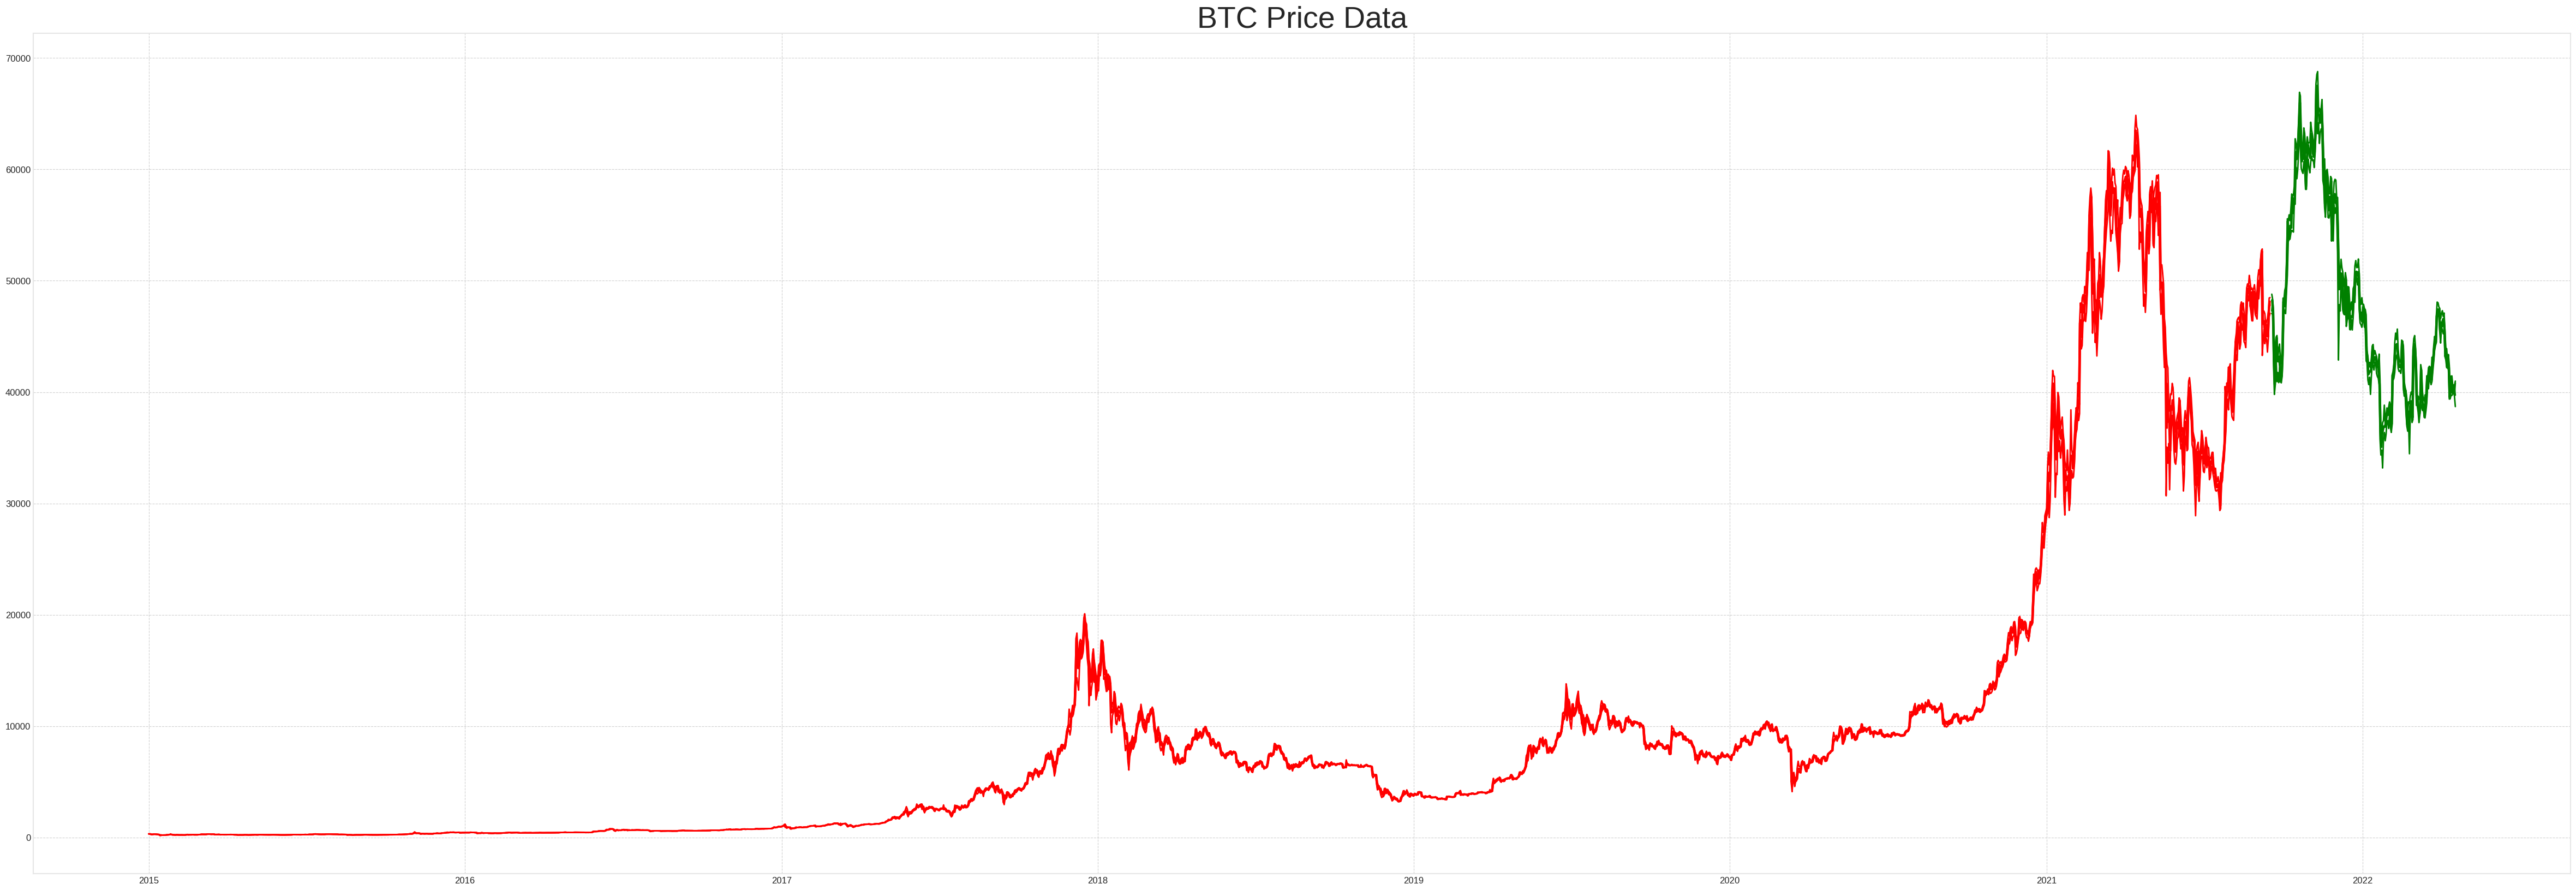

In [51]:
# data perprations
start_time = datetime(2015,1,1)
end_time = datetime.now()- timedelta(1)
data = yf.download('BTC-USD', start_time , end_time)
df = pd.DataFrame(data, columns=['Open','High','Low','Close'])

test_day = int(len(df)* 0.08)
X_train = df[:len(df)-test_day-1]
X_test = df[len(df)- test_day:]
Y_train = df[1:len(df)-test_day]

plot_data(X_train,X_test)

X_train = X_train.values
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train,(len(X_train),1,4))

Y_train = Y_train.values
Y_train = scaler.fit_transform(Y_train)
Y_train = np.reshape(Y_train,(len(Y_train),1,4))

X_test = X_test.values
set_test = scaler.fit_transform(X_test)
set_test = np.reshape(set_test,(len(set_test),1,4))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 200)            164000    
                                                                 
 dense_3 (Dense)             (None, 1, 4)              804       
                                                                 
Total params: 164,804
Trainable params: 164,804
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 2s 22ms/step - loss: 0.0202 - accuracy: 0.2301 - val_loss: 0.1988 - val_accuracy: 0.3259
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 0.2847 - val_loss: 0.1779 - val_accuracy: 0.1263
Epoch 3/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.1796 - val_loss: 0.1579 - val_accuracy: 0.1263
Epoch 4/100
20/20 [

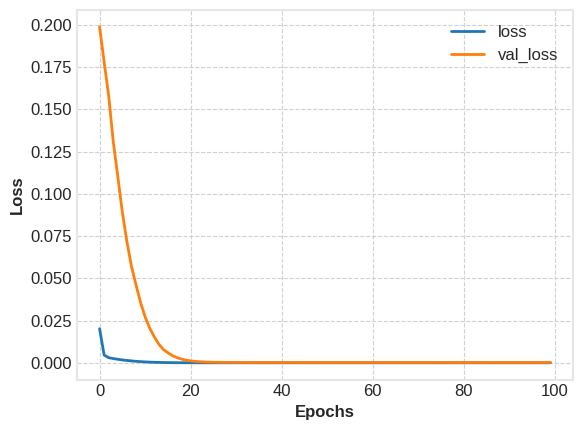

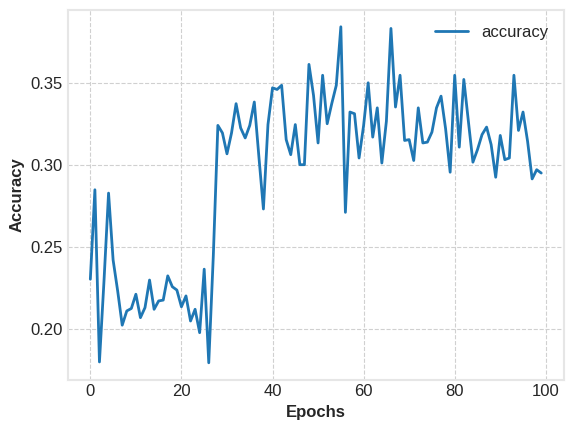

In [52]:
# creating model
Mymodel = Sequential()
Mymodel.add(LSTM(200, activation='sigmoid', input_shape=(1,4),return_sequences=True))
Mymodel.add(Dense(4))
Mymodel.summary()
plot_model(Mymodel, to_file='model_plot.png', show_shapes=True, show_layer_names=False, show_layer_activations=True,show_dtype=True)

# Compile model
Mymodel.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['accuracy'])
#training
history = Mymodel.fit(X_train,X_train, batch_size = 100 , epochs=100, validation_split= 0.2)
plot_history(history)
plot_history2(history)
save = Mymodel.save('model.h5')

In [53]:
# test model
predicted_price = Mymodel.predict(set_test)
predicted_price = scaler.inverse_transform(predicted_price[:,0,:])

In [54]:
# time predict
time_predict = np.arange(datetime.now() - timedelta(len(X_test)-1), datetime.now(), timedelta(days=1)).astype(datetime)
time_test = np.arange(datetime.now() - timedelta(len(X_test)), datetime.now()- timedelta(1) , timedelta(days=1)).astype(datetime)

In [55]:
# time candel predict
time_predict_1 = np.arange(datetime.now() - timedelta(30), datetime.now(), timedelta(days=1)).astype(datetime)
time_test_1 = np.arange(datetime.now() - timedelta(30), datetime.now()- timedelta(1) , timedelta(days=1)).astype(datetime)

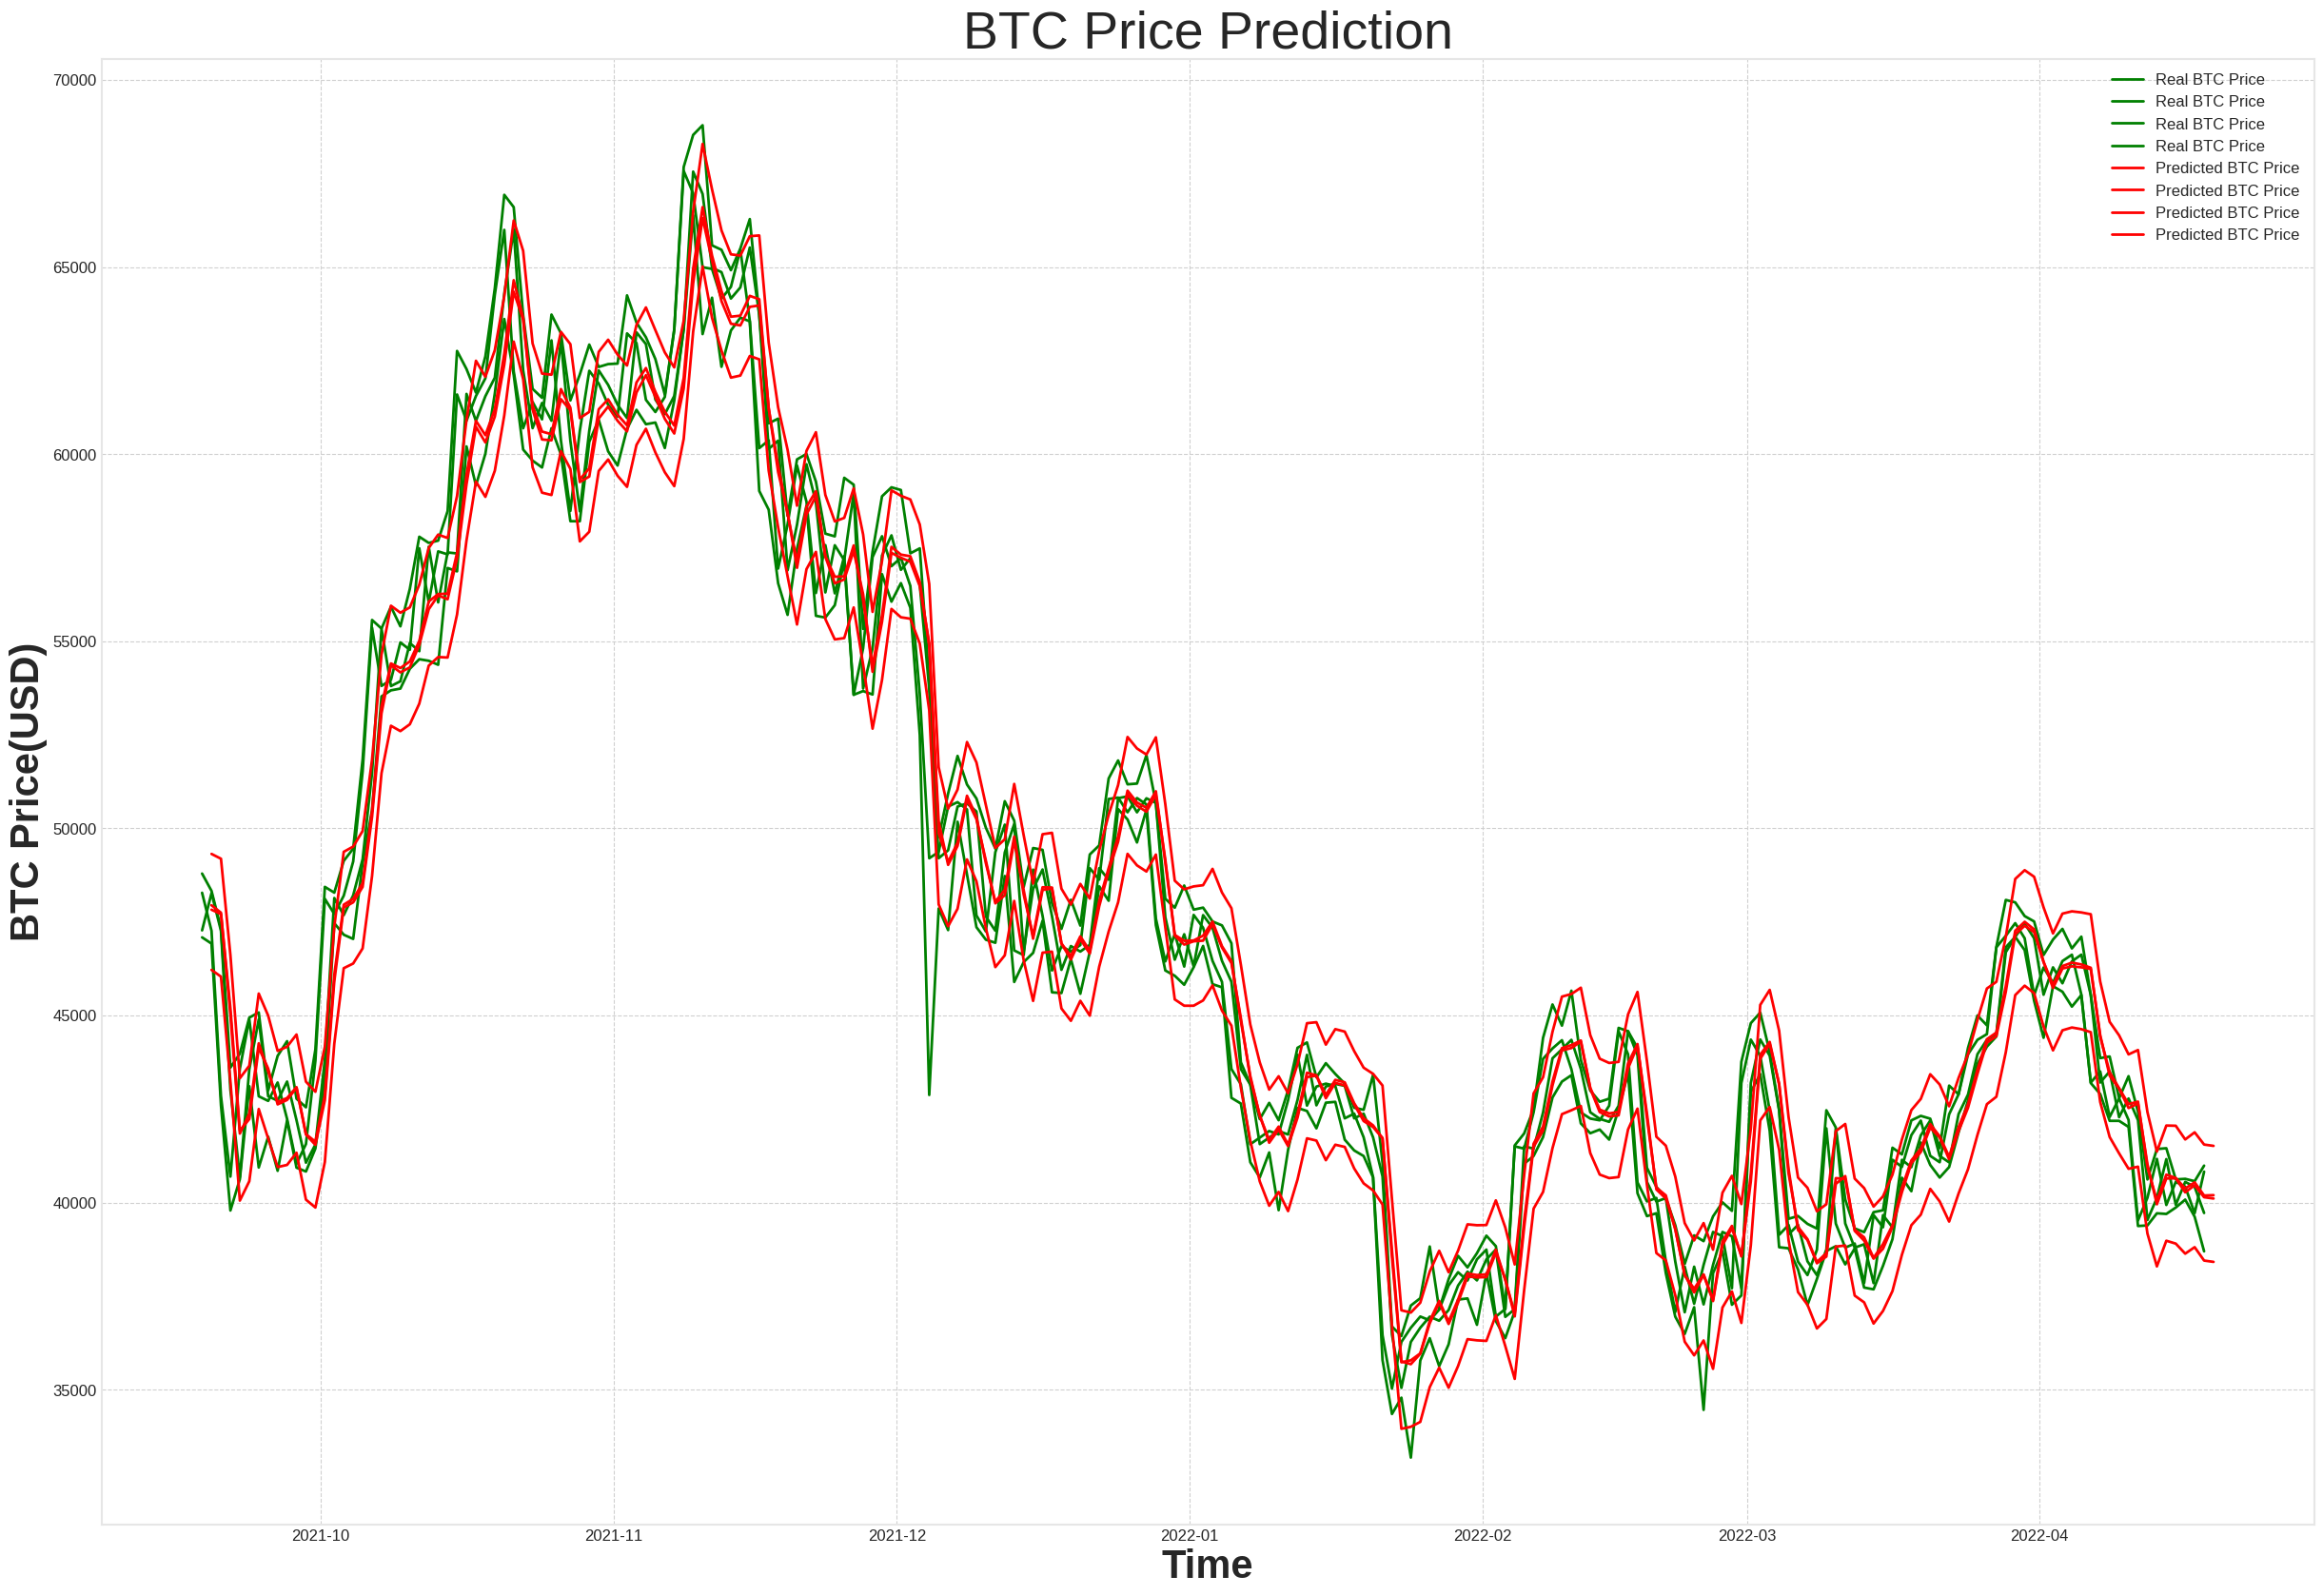

In [56]:
# plot result perdict

plt.figure(figsize=(30, 20))

plt.plot(time_test, X_test,color='green', label='Real BTC Price')
plt.plot(time_predict,predicted_price , color = 'red', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=30)
plt.ylabel('BTC Price(USD)', fontsize = 30)
plt.legend(loc='best')
plt.show()

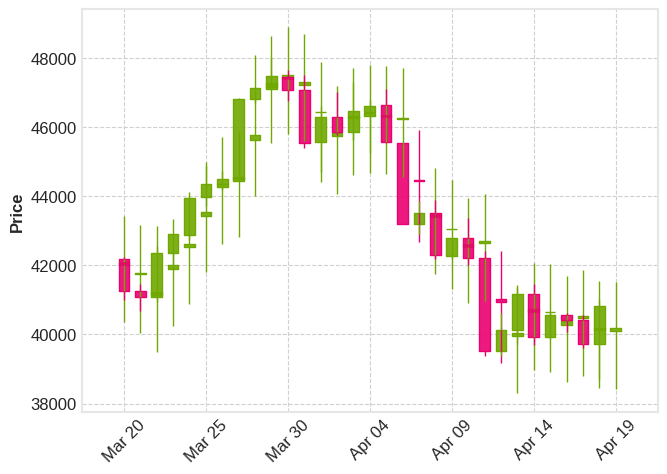

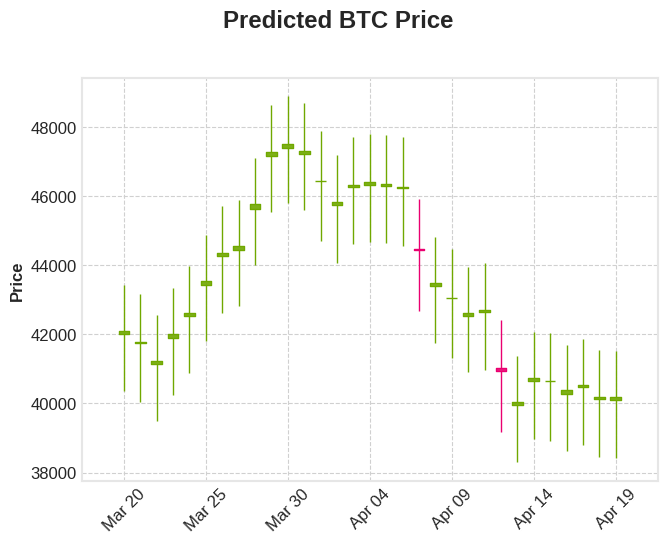

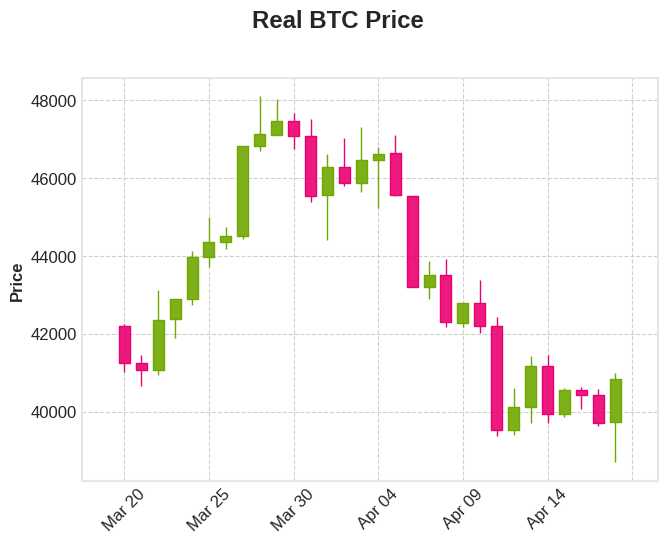

In [57]:
# plot cadle result 30 days
predicted_price_chart = pd.DataFrame(predicted_price[-31:,], columns=['Open','High','Low','Close'], index= time_predict_1)
test_price_chart = pd.DataFrame(X_test[-30:,], columns=['Open','High','Low','Close'], index= time_test_1)
add = mpf.make_addplot(test_price_chart,type='candle')
mpf.plot(predicted_price_chart,type='candle',style ="binance", addplot=add)
mpf.plot(predicted_price_chart,type='candle',style ="binance", title = 'Predicted BTC Price')
mpf.plot(test_price_chart,type='candle',style ="binance", title='Real BTC Price')

In [58]:
print(predicted_price[-1,:])

[40107.9   41514.242 38414.332 40197.316]


In [59]:
# evaluate model
X =X_train[1:,:,:]
Y =Y_train[:-1,:,:]
acc= Mymodel.evaluate(X_train,X_train)
ac=Mymodel.evaluate(X,Y)
print(acc)
print(ac)

77/77 [==============================] - 0s 6ms/step - loss: 4.0859e-05 - accuracy: 0.4282
[4.084226748091169e-05, 0.4283965826034546]
[4.085859109181911e-05, 0.4281632602214813]


In [60]:
# X=[20,100,200, 300]
# Y=[7.91982893133536e-05,7.380041643045843e-05,7.15315982233733e-05,6.403652514563873e-05]

# plt.figure(figsize=(10, 7))

# plt.plot(X, Y ,color='red')

# plt.xlabel('batch size', fontsize=15)
# plt.ylabel('Loss', fontsize = 15)
# plt.show()

In [61]:
# X=[20, 100, 200,300]
# Y=[0.25422295928001404,0.4718013405799866,0.1582491546869278,0.4280303120613098]

# plt.figure(figsize=(10, 7))

# plt.plot(X, Y ,color='green')

# plt.xlabel('batch size', fontsize=15)
# plt.ylabel('Accuracy', fontsize = 15)
# plt.show()

In [62]:
# X=[20,50,100,200]
# Y=[0.44,0.2,0.13,0.28]

# plt.figure(figsize=(10, 7))

# plt.plot(X, Y ,color='green')

# plt.xlabel('epochs', fontsize=15)
# plt.ylabel('Accuracy', fontsize = 15)
# #plt.show()